Social Media Sentiment Analysis (Twitter)

Importing necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import re
import string
import seaborn as sns

Importing Machine Learning Utilities

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
#Suppressing future warning messages
warnings.filterwarnings("ignore", category=FutureWarning)

Loading Dataset

In [4]:
df = pd.read_csv("C:/Users/Sonali/Desktop/Dataset(Sentiments).csv",encoding='latin1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f0460d611d,not well,not well,negative,noon,60-70,Nicaragua,6624554.0,120340.0,55.0
1,6649f3558c,Not a prob hun,Not a prob,positive,night,70-100,Niger,24206644.0,1266700.0,19.0
2,24532ab83c,"at dads, watching some mtv and am going on sim...","at dads, watching some mtv and am going on sim...",neutral,morning,0-20,Nigeria,206139589.0,910770.0,226.0
3,8e1583cb08,Absolutely,Absolutely,neutral,noon,21-30,North Korea,25778816.0,120410.0,214.0
4,4ea61dbc7a,what`s the matter chickadee?,what`s the matter chickadee?,neutral,night,31-45,North Macedonia,2083374.0,25220.0,83.0


Basic dataset information

In [5]:
print(df.shape)
print(df.info())

(1520, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            1488 non-null   object 
 1   text              1487 non-null   object 
 2   selected_text     1487 non-null   object 
 3   sentiment         1488 non-null   object 
 4   Time of Tweet     1488 non-null   object 
 5   Age of User       1488 non-null   object 
 6   Country           1488 non-null   object 
 7   Population -2020  1488 non-null   float64
 8   Land Area (Km²)   1488 non-null   float64
 9   Density (P/Km²)   1488 non-null   float64
dtypes: float64(3), object(7)
memory usage: 118.9+ KB
None


Checking for Null values

In [6]:
df.isna().sum()

textID              32
text                33
selected_text       33
sentiment           32
Time of Tweet       32
Age of User         32
Country             32
Population -2020    32
Land Area (Km²)     32
Density (P/Km²)     32
dtype: int64

Dropping rows with missing values

In [7]:
df.dropna(inplace=True)

In [8]:
#After removing nan values the info is :
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1519
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            1487 non-null   object 
 1   text              1487 non-null   object 
 2   selected_text     1487 non-null   object 
 3   sentiment         1487 non-null   object 
 4   Time of Tweet     1487 non-null   object 
 5   Age of User       1487 non-null   object 
 6   Country           1487 non-null   object 
 7   Population -2020  1487 non-null   float64
 8   Land Area (Km²)   1487 non-null   float64
 9   Density (P/Km²)   1487 non-null   float64
dtypes: float64(3), object(7)
memory usage: 127.8+ KB


Visualizing sentiment distribution

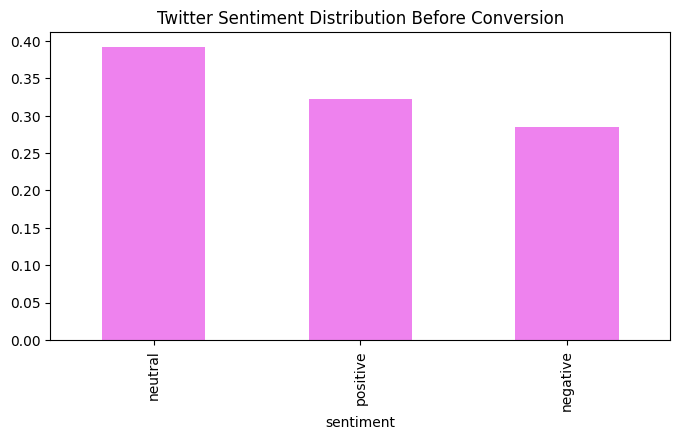

In [9]:
plt.figure(figsize=(8, 4))
df['sentiment'].value_counts(normalize=True).plot(kind='bar',color='violet')
plt.title('Twitter Sentiment Distribution Before Conversion')
plt.show()

Convert categorical variables

In [10]:
df['sentiment'] = pd.Categorical(df['sentiment']).codes
df['Time of Tweet'] = pd.Categorical(df['Time of Tweet']).codes
df['Country'] = pd.Categorical(df['Country']).codes

Age group conversion to numerical approximation

In [11]:
age_mapping = {'0-20': 18, '21-30': 25, '31-45': 38, '46-60': 53, '60-70': 65, '70-100': 80}
df['Age of User'] = df['Age of User'].map(age_mapping)

Age Distribution of Users

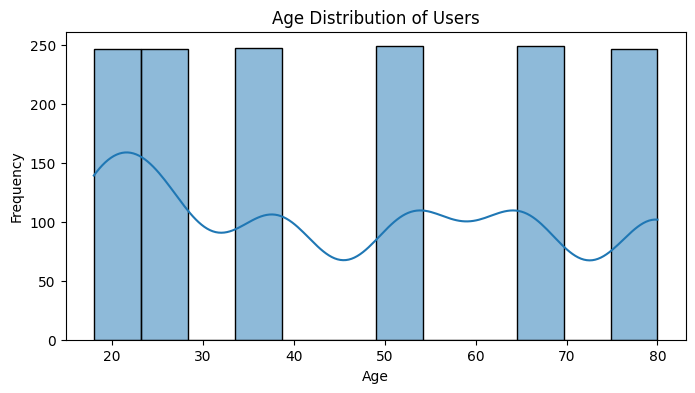

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Age of User'], kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


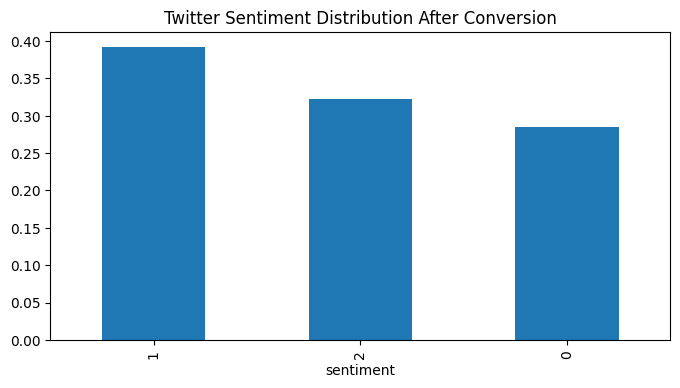

In [13]:
#Plotting Twitter Sentiment Distribution After Conversion
plt.figure(figsize=(8, 4))
df['sentiment'].value_counts(normalize=True).plot(kind='bar')
plt.title('Twitter Sentiment Distribution After Conversion')
plt.show()


Drop Irrelevant columns

In [14]:
df1= df.drop(columns=['textID', 'Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

Preprocessing function for text data

In [15]:

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', " ", text)  # Note: corrected regex pattern from '\\W' to '\W'
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    
    return text

Text cleaning

In [16]:
df1['cleaned_text'] = df1['selected_text'].fillna("").apply(clean_text)

In [17]:
df1.head()

,text,selected_text,sentiment,cleaned_text
0,not well,not well,0,not well
1,Not a prob hun,Not a prob,2,not a prob
2,"at dads, watching some mtv and am going on sim...","at dads, watching some mtv and am going on sim...",1,at dads watching some mtv and am going on in...
3,Absolutely,Absolutely,1,absolutely
4,what`s the matter chickadee?,what`s the matter chickadee?,1,what s the matter chickadee


Prepare data for modeling

In [18]:
X = df1['cleaned_text']
y = df1['sentiment']

In [19]:
print(X)


0                                                not well
1                                              not a prob
2       at dads  watching some mtv and am going on  in...
3                                              absolutely
4                            what s the matter chickadee 
                              ...                        
1515                                                 onna
1516                           hes just not that into you
1517    oh marly  i m so sorry    i hope you find her ...
1518                                         interesting 
1519    is cleaning the house for her family who is co...
Name: cleaned_text, Length: 1487, dtype: object


In [20]:
print(y)

0       0
1       2
2       1
3       1
4       1
       ..
1515    0
1516    1
1517    1
1518    2
1519    1
Name: sentiment, Length: 1487, dtype: int8


Splitting dataset into train and test data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(1487,) (1189,) (298,)


Converting Textual Data to Numerical Data

 ~ Text Vectorization

In [23]:
# Vectorize text
vect = TfidfVectorizer()
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

In [24]:
print(X_train_vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7471 stored elements and shape (1189, 2231)>
  Coords	Values
  (0, 1162)	0.8307429477495273
  (0, 814)	0.5566562267364178
  (1, 1055)	0.22597828488561036
  (1, 1565)	0.41520620879784875
  (1, 1913)	0.21703951518665263
  (1, 299)	0.24828135548583857
  (1, 751)	0.36371450695552254
  (1, 1905)	0.37625424004745034
  (1, 1295)	0.41520620879784875
  (1, 2158)	0.23661289274800992
  (1, 1306)	0.18237938800529643
  (1, 1005)	0.36371450695552254
  (2, 1567)	0.2029425353809321
  (2, 550)	0.1856701714544382
  (2, 1927)	0.3833926257138927
  (2, 1748)	0.16542246115216197
  (2, 1218)	0.25301749118821737
  (2, 2046)	0.22592060827154875
  (2, 1608)	0.21879319577361495
  (2, 1154)	0.18856724021697568
  (2, 270)	0.288837621999635
  (2, 2129)	0.1856701714544382
  (2, 1456)	0.24589007869028354
  (2, 2052)	0.2729869616069521
  (2, 1967)	0.25301749118821737
  :	:
  (1183, 299)	0.22632067475520376
  (1183, 286)	0.31430779946913806
  (1183, 1975)	0.

In [25]:
print(X_test_vect)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1460 stored elements and shape (298, 2231)>
  Coords	Values
  (2, 136)	0.21578293495152298
  (2, 154)	0.20164196530277131
  (2, 180)	0.17129372327809333
  (2, 198)	0.2493754637534502
  (2, 229)	0.29293176983496155
  (2, 428)	0.2218944942909593
  (2, 744)	0.1433544058394791
  (2, 890)	0.2104888614474888
  (2, 916)	0.4506884092562108
  (2, 1100)	0.2253442046281054
  (2, 1334)	0.2493754637534502
  (2, 1665)	0.29293176983496155
  (2, 1927)	0.19441352482846838
  (2, 2166)	0.24326390441401388
  (2, 2188)	0.23796983090997972
  (2, 2202)	0.25660390422775314
  (3, 1912)	1.0
  (4, 1367)	0.4578437959122078
  (4, 1980)	0.8890326532499808
  (5, 71)	0.20883363563055554
  (5, 788)	0.27998727686374486
  (5, 805)	0.2819625960464652
  (5, 809)	0.290583253835097
  (5, 885)	0.2454478613804855
  (5, 1562)	0.36963177323154495
  :	:
  (291, 2039)	0.2142418862961551
  (291, 2162)	0.3227719750879452
  (292, 1015)	0.4907984907663664
  (292, 1912)	0.6

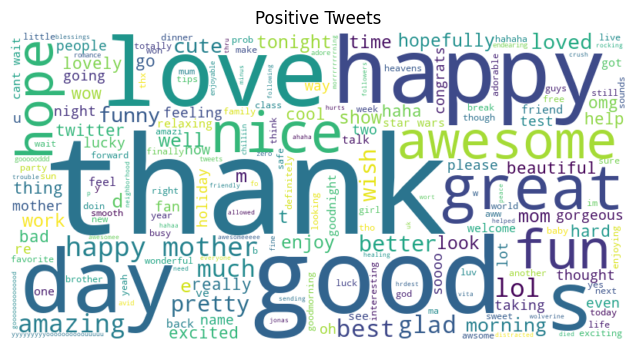

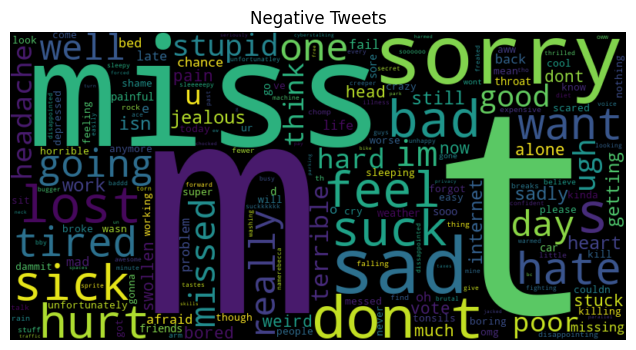

In [30]:
from wordcloud import WordCloud
# Word Cloud for Positive and Negative Tweets
positive_tweets = ' '.join([tweet for tweet in df1[df1['sentiment'] == 2]['cleaned_text']])
negative_tweets = ' '.join([tweet for tweet in df1[df1['sentiment'] == 0]['cleaned_text']])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Tweets')
plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Tweets')
plt.axis('off')
plt.show()



Training the Machine Learning Model

In [31]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate each model
results = {}
for model_name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_vect, X_test_vect, y_train, y_test)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Convert to DataFrame and display
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)



Model Performance Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.791946   0.808063  0.791946  0.789214
Random Forest        0.758389   0.793009  0.758389  0.761462
K-Nearest Neighbors  0.500000   0.672767  0.500000  0.459094
Naive Bayes          0.708054   0.795028  0.708054  0.699413


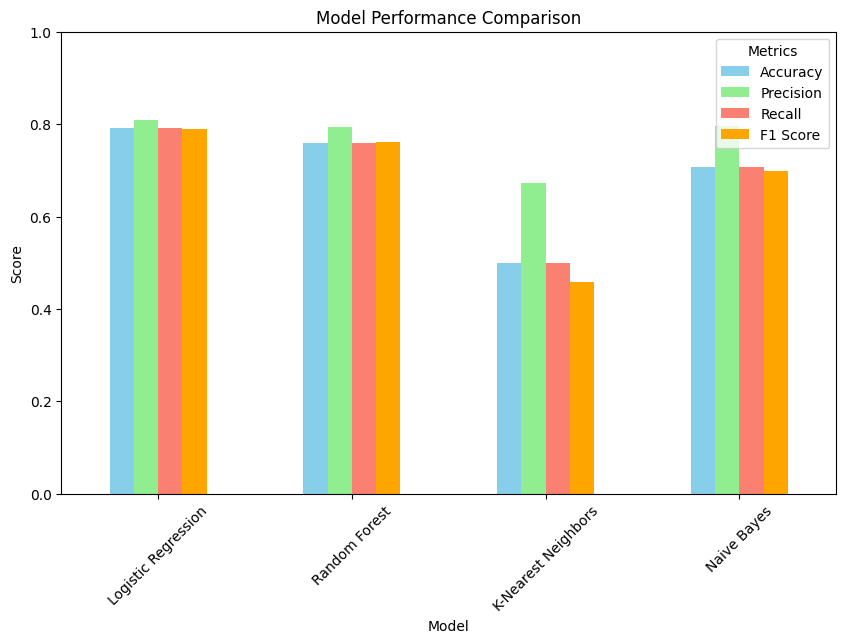

In [32]:
# Plot results
results_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.show()

Hence,Logistic Regression works best among 3 algorithms

In [33]:
best_model = LogisticRegression()
best_model.fit(X_train_vect, y_train)

LogisticRegression()

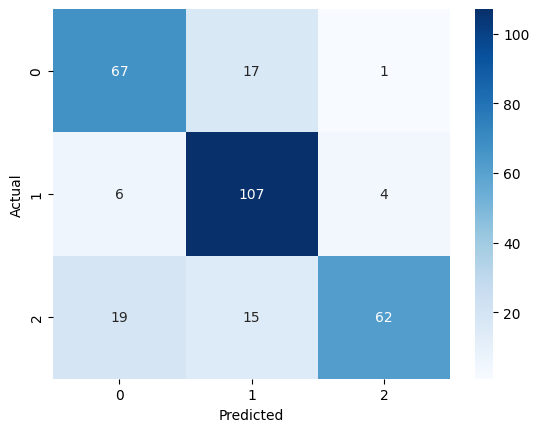

              precision    recall  f1-score   support

    Negative       0.73      0.79      0.76        85
     Neutral       0.77      0.91      0.84       117
    Positive       0.93      0.65      0.76        96

    accuracy                           0.79       298
   macro avg       0.81      0.78      0.78       298
weighted avg       0.81      0.79      0.79       298



In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
predictions = best_model.predict(X_test_vect)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print(classification_report(y_test, predictions, target_names=["Negative", "Neutral", "Positive"]))


In [35]:
#Prediction on the training data
training_data_predict = best_model.predict(X_train_vect)
print(training_data_predict)

[2 1 1 ... 2 2 2]


Accuracy Score

In [36]:
#Accuracy score on training data
training_data_accuracy= accuracy_score(y_train,training_data_predict)
print("Accuracy score on the training data is ",training_data_accuracy)

Accuracy score on the training data is  0.9444911690496215


In [37]:
# #Prediction on Testing Data
test_data_predict = best_model.predict(X_test_vect)
print(test_data_predict)

[0 0 2 2 1 1 0 2 2 1 2 1 0 1 1 0 1 1 1 2 0 1 1 1 1 1 0 1 0 1 2 0 0 0 0 1 2
 1 0 0 2 2 1 1 0 1 2 0 1 1 0 1 2 1 0 1 2 0 1 2 1 2 0 2 0 1 0 0 1 0 0 1 2 1
 1 0 1 1 1 1 0 2 1 0 2 1 1 1 2 1 2 0 1 1 0 0 1 1 1 1 1 0 0 2 1 0 1 1 1 0 1
 0 2 1 1 0 0 0 0 1 1 1 2 0 0 1 2 0 0 0 1 1 1 2 0 1 1 1 2 1 2 0 1 2 2 1 2 0
 1 0 0 2 2 2 0 1 1 0 1 0 0 2 0 0 1 1 2 0 0 1 0 1 2 1 1 2 1 2 1 1 0 0 1 0 1
 1 1 1 0 2 1 1 2 2 2 2 0 0 1 2 1 0 0 1 1 0 0 0 1 2 0 1 1 2 1 2 1 2 1 2 2 1
 0 0 0 0 1 1 1 0 0 0 2 0 0 0 1 2 1 2 2 0 1 0 1 0 0 2 0 2 1 1 0 1 1 1 0 0 1
 2 1 1 1 1 2 1 1 0 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 0 1 2 1 0 2 2 2 1 1
 1 1]


Accuracy Score

In [38]:
# #Accuracy score on the test data
test_data_accuracy= accuracy_score(y_test, test_data_predict)
print("Accuracy score on the testing data is ",test_data_accuracy)

Accuracy score on the testing data is  0.7919463087248322


So the Model Accuracy is 79.1%

Hence our Model is working perfectly

Function for sentiment prediction

In [39]:
# Prediction function
def predict_sentiment(text):
    # Clean the input text
    cleaned_text = clean_text(text)
    
    # Transform the text using the trained vectorizer
    vectorized_text = vect.transform([cleaned_text])
    
    # Make a prediction using the best model
    prediction = best_model.predict(vectorized_text)
    
    # Map prediction to sentiment labels (assuming 0 = Negative, 1 = Neutral, 2 = Positive)
    sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_labels[prediction[0]]

~Example Usage

In [40]:
sample_texts = [
    "I love this product! It's amazing!",
    "This is not a pen that I want",
    "It was okay, nothing special",
    "kill you",
]

for text in sample_texts:
    print("Text:",text)
    print("Predicted Sentiment:" ,predict_sentiment(text))

Text: I love this product! It's amazing!
Predicted Sentiment: Positive
Text: This is not a pen that I want
Predicted Sentiment: Negative
Text: It was okay, nothing special
Predicted Sentiment: Neutral
Text: kill you
Predicted Sentiment: Negative


Hence,Our Model is working properly and we are able to classify user sentiments successfully